In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
%matplotlib inline

In [3]:
file_path = r'C:\Users\BuntrockR\OneDrive - Novelis Inc\Documents\0_Python\Git\Sales Data Analysis\Regional Sales Dataset.xlsx'

In [4]:
sheets = pd.read_excel(file_path, sheet_name=None)

df_sales       = sheets['Sales Orders']
df_customers   = sheets['Customers']
df_products    = sheets['Products']
df_regions     = sheets['Regions']
df_state_reg   = sheets['State Regions']
df_budgets     = sheets['2017 Budgets']

In [5]:
df_state_reg.columns = df_state_reg.iloc[0]      # Set first row as column names
df_state_reg = df_state_reg[1:].reset_index(drop=True)  # Drop the first row and reset index

In [6]:
for df in [df_sales,df_customers,df_products,df_regions,df_state_reg,df_budgets]:
    print(df.head(1))
    print()

    OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0  SO - 0001018 2014-12-22                    7  Distributor           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    656                          1   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  
0               6      5306.4     31838.4         2440.944  

   Customer Index Customer Names
0               1  Geiss Company

   Index Product Name
0      1    Product 1

   id    name      county state_code    state  type  latitude  longitude  \
0   1  Auburn  Lee County         AL  Alabama  City  32.60986  -85.48078   

   area_code  population  households  median_income  land_area  water_area  \
0        334       62059       21767          38342  152375113     2646161   

         time_zone  
0  America/Chicago  

0 State Code    State Region
0         AL  Alabama  South

  Product Name  2017 Budgets
0    Product 1   3016489.2

In [7]:
for df in [df_sales,df_customers,df_products,df_regions,df_state_reg,df_budgets]:
    print(df.info(1))
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

## Check for null values

In [8]:
for df in [df_sales,df_customers,df_products,df_regions,df_state_reg,df_budgets]:
    print(df.isnull().sum())
    print()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

Customer Index    0
Customer Names    0
dtype: int64

Index           0
Product Name    0
dtype: int64

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

0
State Code    0
State         0
Region        0
dtype: int64

Product Name    0
2017 Budgets    0
dtype: int64



## Check for duplicates

In [9]:
for df in [df_sales,df_customers,df_products,df_regions,df_state_reg,df_budgets]:
    duplicate_rows = df[df.duplicated()]
    print(duplicate_rows)
    print()

Empty DataFrame
Columns: [OrderNumber, OrderDate, Customer Name Index, Channel, Currency Code, Warehouse Code, Delivery Region Index, Product Description Index, Order Quantity, Unit Price, Line Total, Total Unit Cost]
Index: []

Empty DataFrame
Columns: [Customer Index, Customer Names]
Index: []

Empty DataFrame
Columns: [Index, Product Name]
Index: []

Empty DataFrame
Columns: [id, name, county, state_code, state, type, latitude, longitude, area_code, population, households, median_income, land_area, water_area, time_zone]
Index: []

Empty DataFrame
Columns: [State Code, State, Region]
Index: []

Empty DataFrame
Columns: [Product Name, 2017 Budgets]
Index: []



## Data Merging

In [29]:
#Merge Sales with Customers
df = df_sales.merge(df_customers,how='left',left_on='Customer Name Index',right_on='Customer Index')
df.drop(columns=['Customer Index'], inplace=True)

#Merge Master with SKU
df = df.merge(df_products,how='left',left_on='Product Description Index',right_on='Index')
df.drop(columns=['Index'], inplace=True)

#Merge Master with Region
df = df.merge(df_regions,how='left',left_on='Delivery Region Index',right_on='id')
df.drop(columns=['id'], inplace=True)

#Merge Master with State Region
df = df.merge(df_state_reg[["State Code","Region"]],how='left',left_on='state_code',right_on='State Code')
df.drop(columns=['State Code'], inplace=True)

#Merge Master with Budget
df = df.merge(df_budgets,how='left',on='Product Name')

df.drop(columns=['Delivery Region Index','longitude','latitude','population','land_area','water_area','time_zone'], inplace=True)

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Product Description Index,Order Quantity,Unit Price,Line Total,...,name,county,state_code,state,type,area_code,households,median_income,Region,2017 Budgets
0,SO - 0001018,2014-12-22,7,Distributor,USD,AXW291,1,6,5306.4,31838.4,...,Concord,Cabarrus County,NC,North Carolina,City,704,29921,53587,South,3016489.209
1,SO - 0001018,2015-08-07,7,Distributor,USD,AXW291,1,6,5306.4,31838.4,...,Hamburg (Town),Erie County,NY,New York,Town,716,23895,62383,Northeast,3016489.209
2,SO - 0001018,2015-08-10,7,Distributor,USD,AXW291,1,6,5306.4,31838.4,...,West Covina,Los Angeles County,CA,California,City,626,30816,69189,West,3016489.209
3,SO - 0001018,2015-12-03,7,Distributor,USD,AXW291,1,6,5306.4,31838.4,...,Rochester,Olmsted County,MN,Minnesota,City,507,43634,64554,Midwest,3016489.209
4,SO - 0001018,2016-08-21,7,Distributor,USD,AXW291,1,6,5306.4,31838.4,...,Palmdale,Los Angeles County,CA,California,City,661,42720,52392,West,3016489.209


In [30]:
#df.to_excel("sales_data.xlsx", index=False)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Product Description Index  64104 non-null  int64         
 7   Order Quantity             64104 non-null  int64         
 8   Unit Price                 64104 non-null  float64       
 9   Line Total                 64104 non-null  float64       
 10  Total Unit Cost            64104 non-null  float64       
 11  Customer Names             64104 non-null  object        
 12  Prod

In [32]:
#total cost for each line item
df['total_cost'] = df['Order Quantity'] * df['Total Unit Cost']

#profit as revenue minus total_cost
df['profit'] = df['Line Total'] - df['total_cost']

#profit margin as a percentage
df['profit_margin'] = (df['profit'] / df['Line Total']) * 100

#month name for seasonality
df['order_month_name'] = df['OrderDate'].dt.month_name()

#month number from OrderDate (1–12)
df['order_month_num'] = df['OrderDate'].dt.month

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Product Description Index,Order Quantity,Unit Price,Line Total,...,area_code,households,median_income,Region,2017 Budgets,total_cost,profit,profit_margin,order_month_name,order_month_num
0,SO - 0001018,2014-12-22,7,Distributor,USD,AXW291,1,6,5306.4,31838.4,...,704,29921,53587,South,3016489.209,14645.664,17192.736,54.0,December,12
1,SO - 0001018,2015-08-07,7,Distributor,USD,AXW291,1,6,5306.4,31838.4,...,716,23895,62383,Northeast,3016489.209,14645.664,17192.736,54.0,August,8
2,SO - 0001018,2015-08-10,7,Distributor,USD,AXW291,1,6,5306.4,31838.4,...,626,30816,69189,West,3016489.209,14645.664,17192.736,54.0,August,8
3,SO - 0001018,2015-12-03,7,Distributor,USD,AXW291,1,6,5306.4,31838.4,...,507,43634,64554,Midwest,3016489.209,14645.664,17192.736,54.0,December,12
4,SO - 0001018,2016-08-21,7,Distributor,USD,AXW291,1,6,5306.4,31838.4,...,661,42720,52392,West,3016489.209,14645.664,17192.736,54.0,August,8


In [33]:
df.columns = df.columns.str.lower()

# EDA

In [97]:
# Overall Sales Statistics
total_revenue = df['line total'].sum()
total_profit = df['profit'].sum()
average_order_value = df['line total'].mean()
max_order_value = df['line total'].max()
total_orders = df['ordernumber'].nunique()
total_customers = df['customer names'].nunique()
total_products = df['product name'].nunique()

print("Overall Sales Statistics")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Order Value: ${average_order_value:,.2f}")
print(f"Largest Order Value: ${max_order_value:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Total Unique Customers: {total_customers}")
print(f"Total Unique Products: {total_products}")

Overall Sales Statistics
Total Revenue: $1,235,968,899.00
Total Profit: $461,772,559.92
Average Order Value: $19,280.68
Largest Order Value: $78,711.60
Total Orders: 10684
Total Unique Customers: 175
Total Unique Products: 30


C:\Users\BuntrockR\AppData\Local\Temp\ipykernel_29112\3145973871.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df['line total']), kde=False)


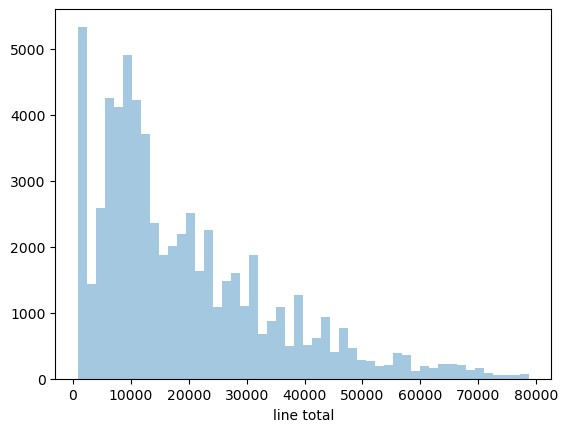

In [93]:
sns.distplot((df['line total']), kde=False)
plt.show()

## 1. Monthly Sales over time

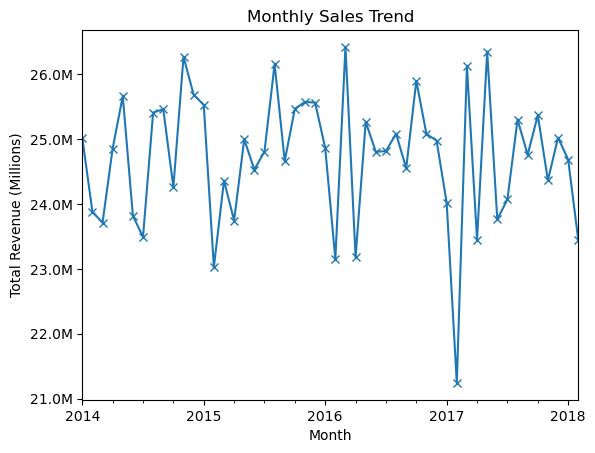

In [34]:
# orderdate per month
df['order_month'] = df['orderdate'].dt.to_period('M')

# total revenue for each month
monthly_sales = df.groupby('order_month')['line total'].sum()

monthly_sales.plot(marker='x')

# Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.show()

## 2. Monthly trend excluding 2018

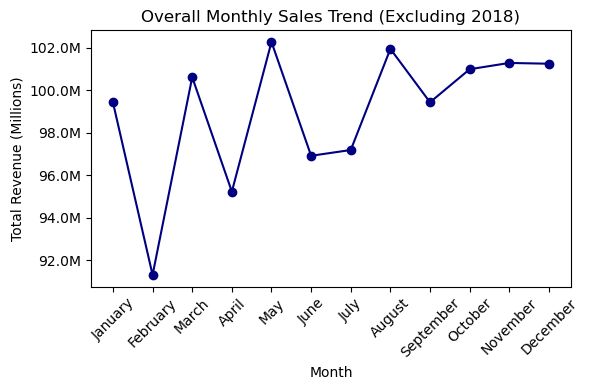

In [98]:
#Filter out any 2018 orders
df_ = df[df['orderdate'].dt.year != 2018]   # exclude partial data from 2018

#Group by month number and month name, sum line total
monthly_sales = (df_.groupby(['order_month_num', 'order_month_name'])['line total'].sum().sort_index())

plt.figure(figsize=(6, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),  # X-axis: month names
    monthly_sales.values,                     # Y-axis: total revenue
    marker='o',                                # circle markers
    color='navy'                               # line color
)

#Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

#Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. SKU Profitability Ranking (high to low)

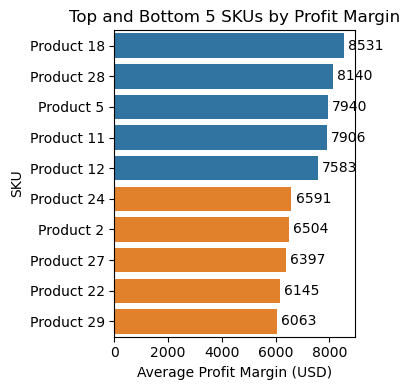

In [69]:
# average profit margin per product
top_margin = df.groupby('product name')['profit'].mean().sort_values(ascending=False).head(5)
bottom_margin = df.groupby('product name')['profit'].mean().sort_values(ascending=False).tail(5)

df_ = pd.concat([top_margin, bottom_margin])

plt.figure(figsize=(4, 4))

ax = sns.barplot(
    x=df_.values,
    y=df_.index, 
    hue=['Blue'] * 5 + ['Red'] * 5,
    dodge=False,
    #palette={'Blue': 'blue', 'Red': 'red'}
)

# Remove the legend if not needed
ax.legend_.remove()


# Add value labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)


plt.title('Top and Bottom 5 SKUs by Profit Margin')  # Chart title
plt.xlabel('Average Profit Margin (USD)')          # X-axis label
plt.ylabel('SKU')                         # Y-axis label

plt.tight_layout()
plt.show()

## 4. Sales Channel Analysis

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

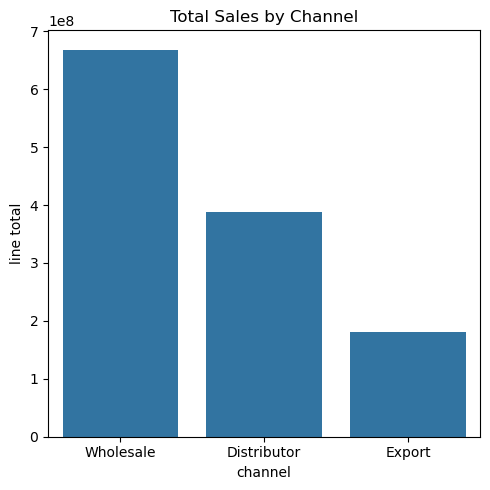

In [74]:
chan_sales = df.groupby('channel')['line total'].sum().sort_values(ascending=False)

# Set figure size for the pie chart
plt.figure(figsize=(5, 5))

# Plot pie chart with percentage labels and a defined start angle
sns.barplot(chan_sales)     


# Add title for context
plt.title('Total Sales by Channel')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()

## 5. Regional Analysis

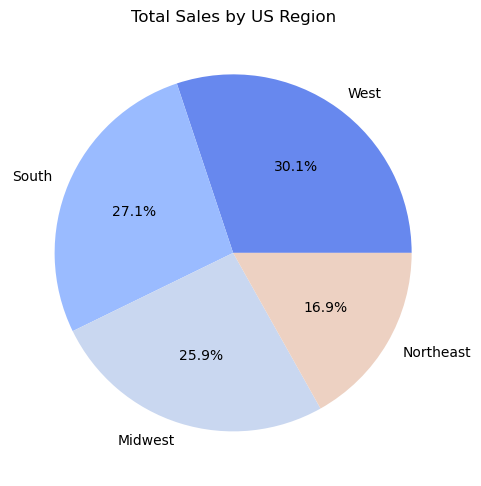

In [124]:
region_sales = df.groupby('region')['line total'].sum().sort_values(ascending=False)


plt.figure(figsize=(5, 5))

# Plot pie chart with percentage labels and a defined start angle
plt.pie(
    region_sales.values,                   # Data: revenue values per channel
    labels=region_sales.index,             # Labels: channel names
    autopct='%1.1f%%',                   # Display percentages with one decimal
    colors=sns.color_palette('coolwarm') # Color palette for slices
)
   


# Add title for context
plt.title('Total Sales by US Region')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()

<Figure size 1400x700 with 0 Axes>

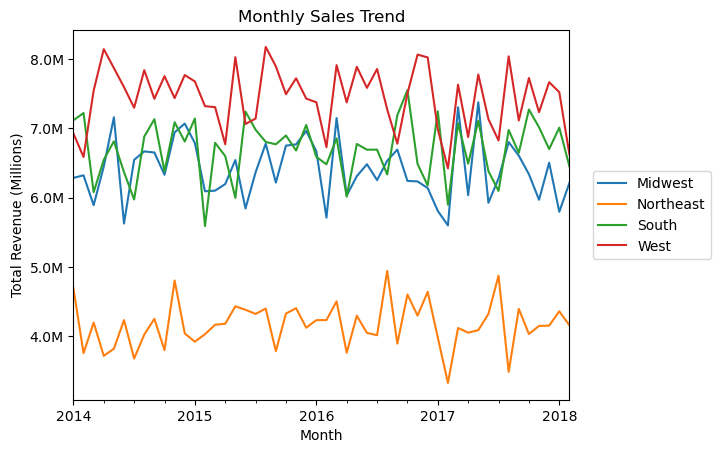

In [203]:
# orderdate per month
df['order_month'] = df['orderdate'].dt.to_period('M')

# total revenue for each month
monthly_sales = df.groupby(['order_month','region'])['line total'].sum()

plt.figure(figsize=(14, 7))
monthly_sales = df.groupby(['order_month','region'])['line total'].sum()

monthly_sales.unstack().plot()

# Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.show()

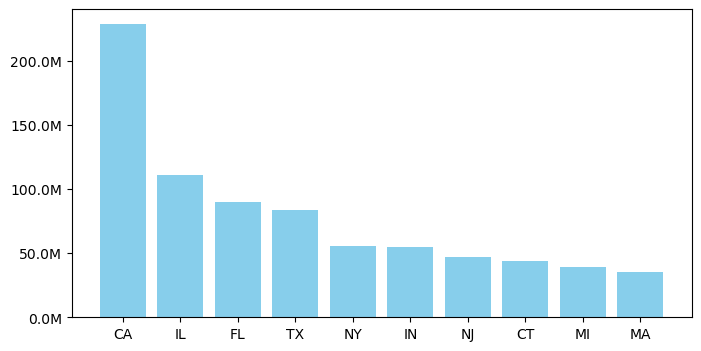

In [122]:
state_sales = df.groupby('state_code')['line total'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 4))
plt.bar(state_sales.index, state_sales.values, width=0.8, color='skyblue')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


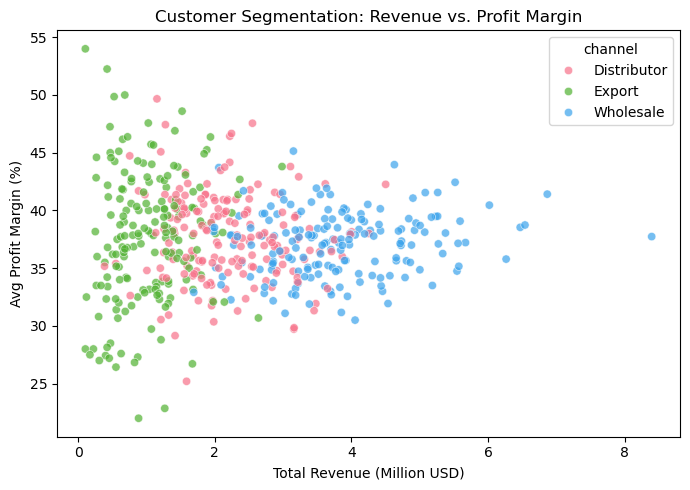

In [182]:
cust_summary = df.groupby(['customer names','channel']).agg(
    total_revenue=('line total', 'sum'),
    avg_margin=('profit_margin', 'mean'),
    channel=('channel', 'min')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    hue='channel',
    palette='husl',
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()

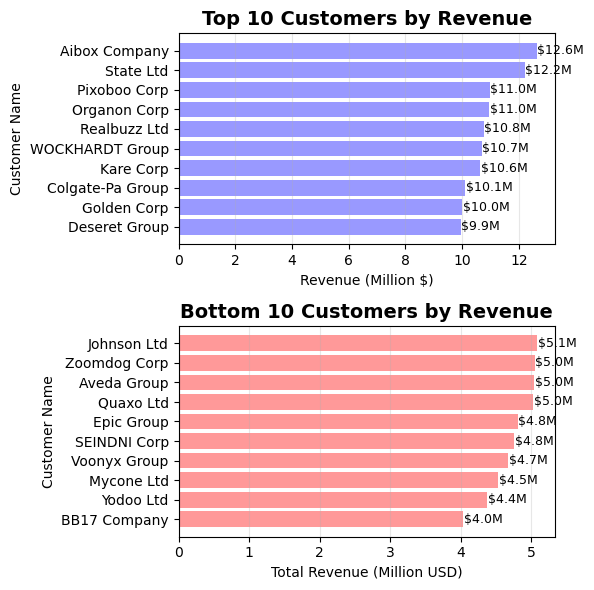

In [212]:

# Calculate revenue for all customers once
customer_revenue = df.groupby('customer names')['line total'].sum()

# Get top and bottom 10 by revenue
top_10 = customer_revenue.nlargest(10).sort_values(ascending=True)  # Top 10 by revenue, ascending
bottom_10 = customer_revenue.nsmallest(10).sort_values(ascending=True)  # Bottom 10 by revenue, descending

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# Top 10 customers
ax1.barh(top_10.index, top_10.values / 1e6, color='blue', alpha=0.4)
ax1.set_title('Top 10 Customers by Revenue', fontsize=14, fontweight='bold')
ax1.set_xlabel('Revenue (Million $)')
ax1.set_ylabel('Customer Name')
ax1.grid(axis='x', alpha=0.3)

# Bottom 10 customers
ax2.barh(bottom_10.index, bottom_10.values / 1e6, color='red', alpha=0.4)
ax2.set_title('Bottom 10 Customers by Revenue', fontsize=14, fontweight='bold')
ax2.set_xlabel('Total Revenue (Million USD)')
ax2.set_ylabel('Customer Name')
ax2.grid(axis='x', alpha=0.3)

# Add value labels to both plots
for ax, data in [(ax1, top_10), (ax2, bottom_10)]:
    for i, (customer, revenue) in enumerate(data.items()):
        ax.text(revenue/1e6 + 0.01, i, f'${revenue/1e6:.1f}M',
                va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()